<a href="https://colab.research.google.com/github/Spocklight/Fake_News_Detection/blob/master/Master_Sentiment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>Detección de noticias falsas</center></h1>
<h3><center>Alejandro Sierra Fernández</center></h3>
<h4><center>01/08/2022</center></h4>

*   <h2>Análisis de sentimiento</h2>

<font color='darkblue'> En este Notebook aplicaremos la técnica conocida como *sentiment analysis* haciendo uso de la librería TextBlob. Obtendremos dos parámetros, la 'polaridad' y la 'subjetividad. El primero tiene un dominio D={-1,+1} y mide el grado de positividad y negatividad de un conjunto de palabras. EL segundo tiene un dominio D={0,1} y mide el grado de subjetividad, opinión, emoción o juicio de un mensaje.

Empezamos cargando las librerías que vamos a emplear y el dataframe con nuestros datos:</font>

In [ ]:
from textblob import TextBlob

from tqdm.autonotebook import tqdm  
tqdm.pandas()

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

import re

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pickle                                    
path = '/content/drive/MyDrive/Fake_News/'
pickle_in = open(path + 'ISOT_topic_pickle', 'rb')
ISOT = pickle.load(pickle_in)

In [ ]:
display(ISOT.dtypes)

title                    object
text                     object
subject                  object
date                     object
normaliza_text           object
normaliza_title          object
clean_text               object
clean_title              object
char_len_title            int64
char_len_text             int64
char_len_title_t          int64
char_len_text_t           int64
token_text_len            int64
token_title_len           int64
prop_uppercase_text     float64
prop_uppercase_title    float64
prop_long_text          float64
prop_long_title         float64
target                   object
normaliza_b_filter       object
topic_modelling          object
topic_modelling_max       int64
dtype: object

<font color='darkblue'> Definimos las funciones para obtener los dos parámetros definidos anteriormente. Además, definimos la función 'getAnalysis' para obtener una variable binaria y que describe una polaridad  positiva o negativa. La función la aplicaremos sobre las variables 'clean_text' y 'clean_title' de nuestro dataframe.</font>

In [ ]:
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

def getAnalysis(score):
  if score < 0:
    return -1
  elif score == 0:
    return 0
  else:
    return 1

In [ ]:
ISOT['Sentimiento_text'] = ISOT['clean_text'].progress_apply(lambda x: getPolarity(x))
ISOT['Subjetividad_text'] = ISOT['clean_text'].progress_apply(lambda x: getSubjectivity(x))
ISOT['Análisis_text'] = ISOT['Sentimiento_text'].progress_apply(lambda x: getAnalysis(x))

ISOT['Sentimiento_title'] = ISOT['clean_title'].progress_apply(lambda x: getPolarity(x))
ISOT['Subjetividad_title'] = ISOT['clean_title'].progress_apply(lambda x: getSubjectivity(x))
ISOT['Análisis_title'] = ISOT['Sentimiento_title'].progress_apply(lambda x: getAnalysis(x))

  0%|          | 0/38265 [00:00<?, ?it/s]

  0%|          | 0/38265 [00:00<?, ?it/s]

  0%|          | 0/38265 [00:00<?, ?it/s]

  0%|          | 0/38265 [00:00<?, ?it/s]

  0%|          | 0/38265 [00:00<?, ?it/s]

  0%|          | 0/38265 [00:00<?, ?it/s]

<font color='darkblue'> Obtenemos los  countplots, histogramas y boxplots de las nuevas variables que acabamos de definir. Lo hacemos tanto para las noticias falsas como para las verdaderas.</font>

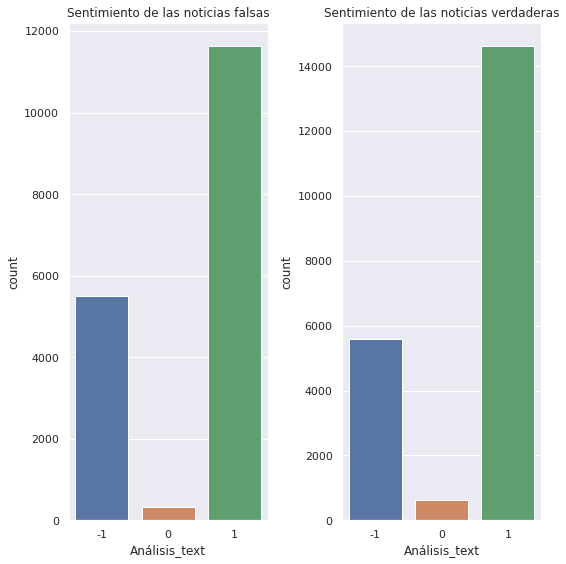

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
sns.set_theme(style="darkgrid")
sns.countplot(x="Análisis_text", data = ISOT[ISOT['target']=='Fake'], ax=axes[0]).set(title='Sentimiento de las noticias falsas')
sns.countplot(x="Análisis_text", data = ISOT[ISOT['target']=='True'], ax=axes[1]).set(title='Sentimiento de las noticias verdaderas')
fig.tight_layout()
fig.show()

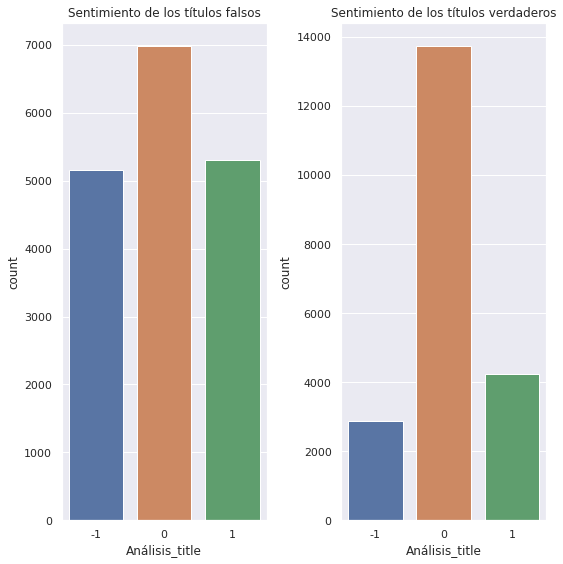

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
sns.countplot(x="Análisis_title", data = ISOT[ISOT['target']=='Fake'], ax=axes[0]).set(title='Sentimiento de los títulos falsos')
sns.countplot(x="Análisis_title", data = ISOT[ISOT['target']=='True'], ax=axes[1]).set(title='Sentimiento de los títulos verdaderos')
fig.tight_layout()
fig.show()

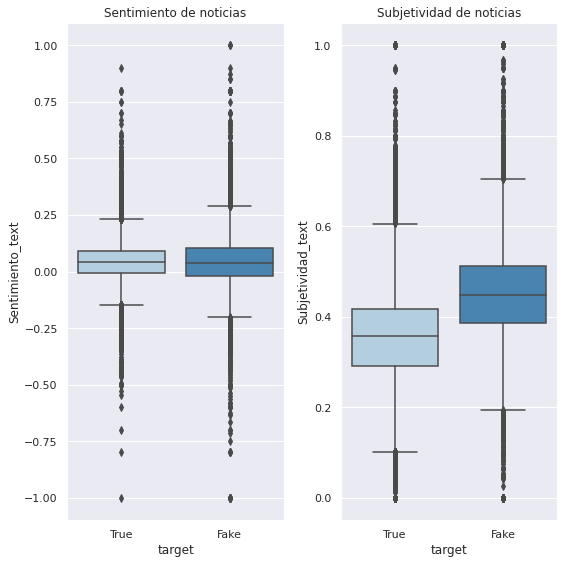

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
sns.boxplot(y="Sentimiento_text", x=ISOT["target"], data=ISOT, ax=axes[0], palette="Blues").set(title='Sentimiento de noticias')
sns.boxplot(y="Subjetividad_text", x=ISOT["target"], data=ISOT, ax=axes[1], palette="Blues").set(title='Subjetividad de noticias')
fig.tight_layout()
fig.show()

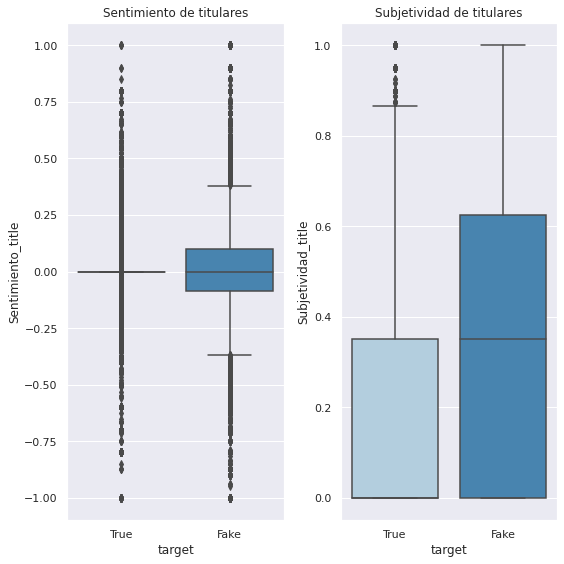

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(8, 8))
sns.boxplot(y="Sentimiento_title", x=ISOT["target"], data=ISOT, ax=axes[0], palette="Blues").set(title='Sentimiento de titulares')
sns.boxplot(y="Subjetividad_title", x=ISOT["target"], data=ISOT, ax=axes[1], palette="Blues").set(title='Subjetividad de titulares')
fig.tight_layout()
fig.show()

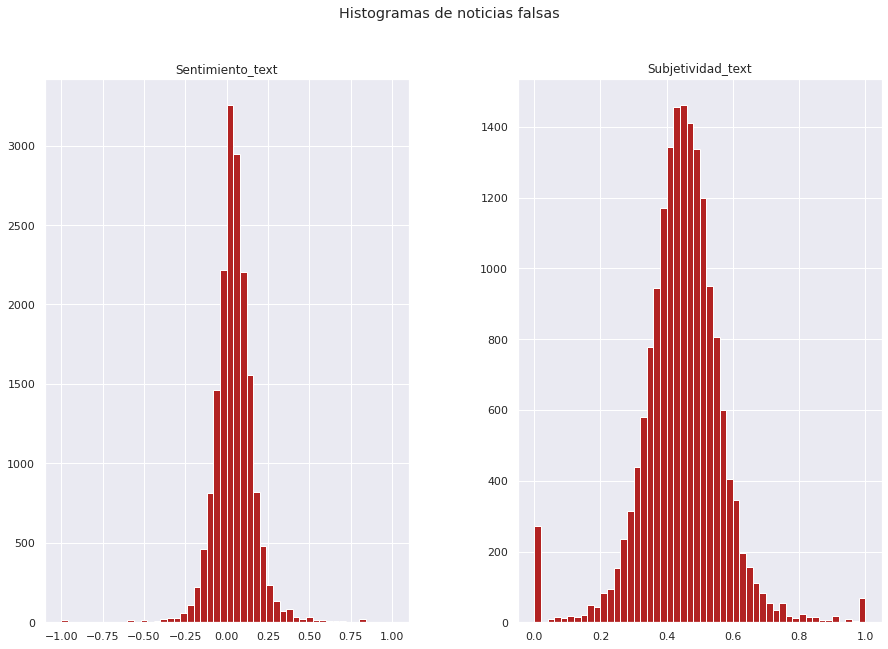

In [ ]:
sns.set_palette("Paired")
ISOT[ISOT['target']=='Fake'].hist(column=["Sentimiento_text", "Subjetividad_text"], color='firebrick', bins=50, figsize=(15,10))
plt.suptitle("Histogramas de noticias falsas")
plt.show()

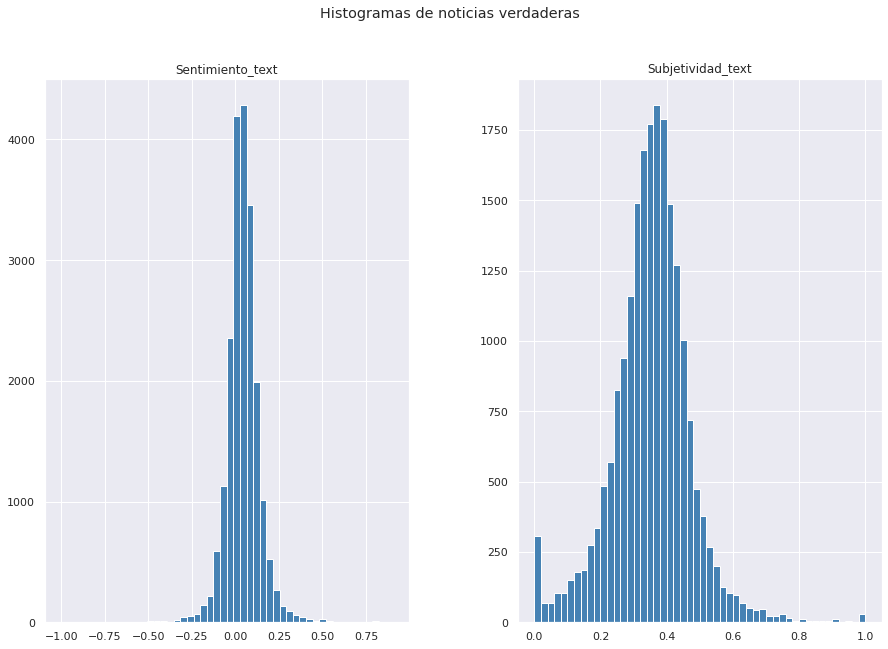

In [ ]:
ISOT[ISOT['target']=='True'].hist(column=["Sentimiento_text", "Subjetividad_text"], color='steelblue', bins=50, figsize=(15,10))
plt.suptitle("Histogramas de noticias verdaderas")
plt.show()

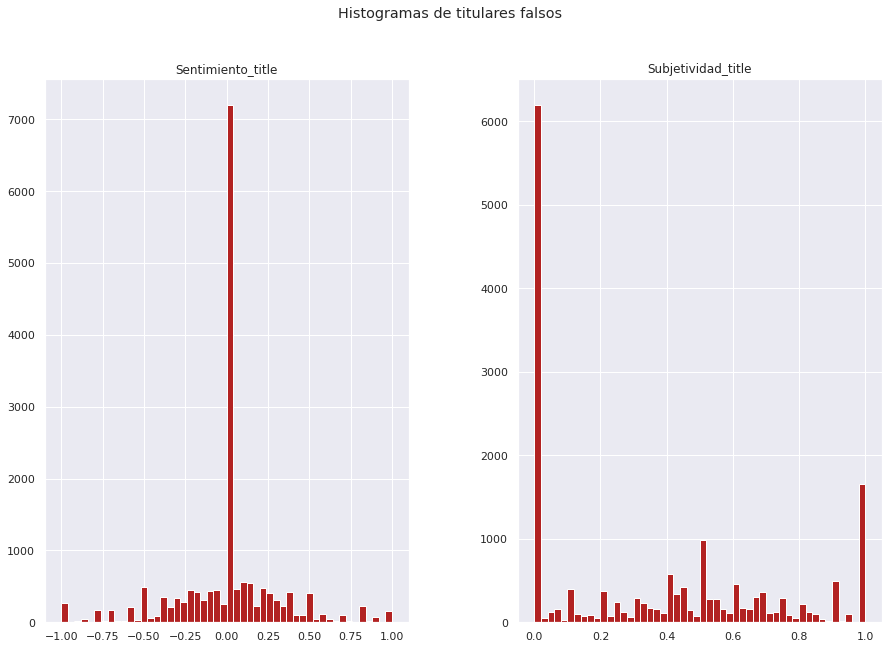

In [ ]:
ISOT[ISOT['target']=='Fake'].hist(column=["Sentimiento_title", "Subjetividad_title"], color='firebrick', bins=50, figsize=(15,10))
plt.suptitle("Histogramas de titulares falsos")
plt.show()

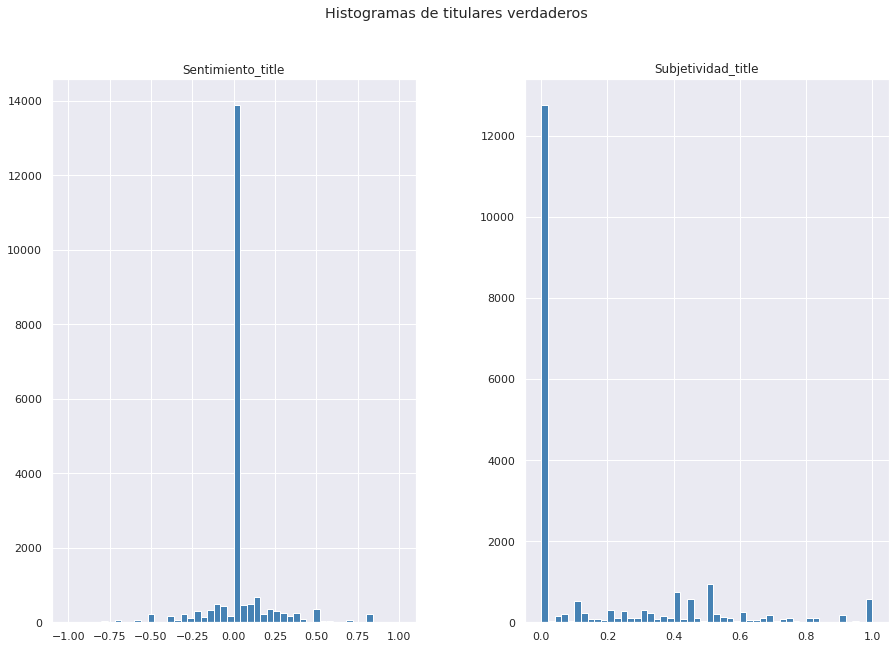

In [ ]:
ISOT[ISOT['target']=='True'].hist(column=["Sentimiento_title", "Subjetividad_title"], color='steelblue', bins=50, figsize=(15,10))
plt.suptitle("Histogramas de titulares verdaderos")
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


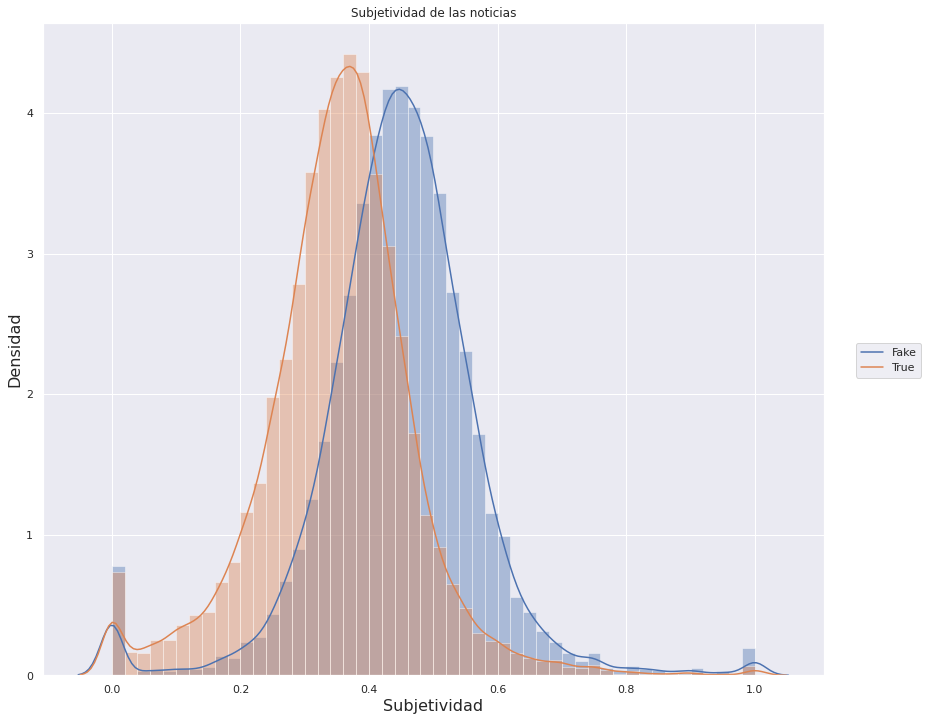

In [ ]:
sns.set_theme(style="darkgrid")
fig = plt.figure(figsize=(14,12))

plt1 = sns.distplot(ISOT[ISOT['target']=='Fake']["Subjetividad_text"], hist=True)
plt2 = sns.distplot(ISOT[ISOT['target']=='True']["Subjetividad_text"], hist=True)
fig.legend(labels=['Fake','True'], loc = 5)

plt.xlabel('Subjetividad', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.title('Subjetividad de las noticias')

plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


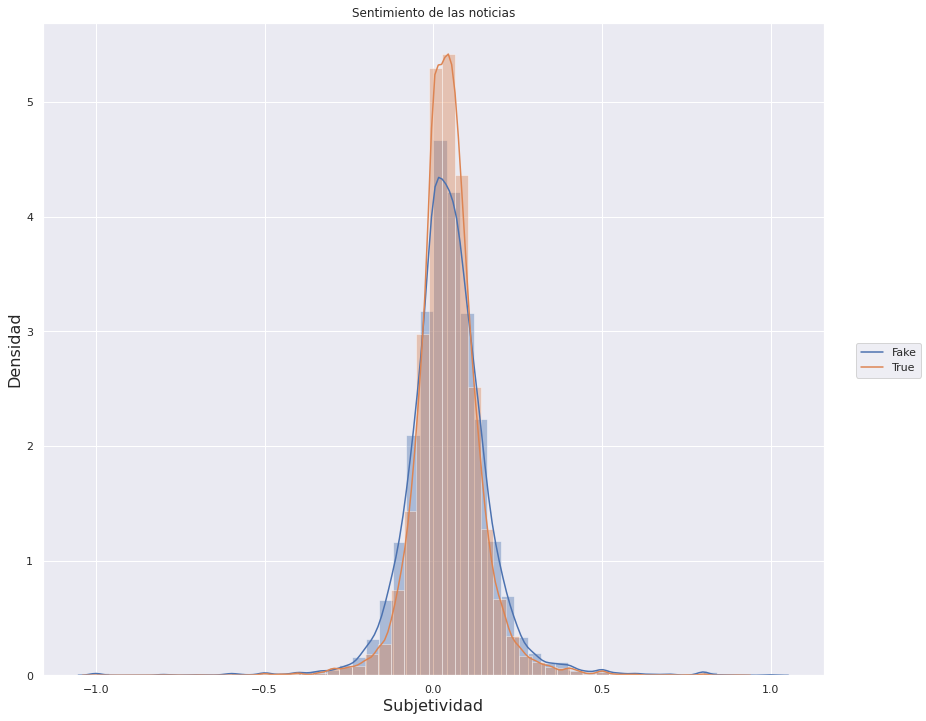

In [ ]:
fig = plt.figure(figsize=(14,12))

plt1 = sns.distplot(ISOT[ISOT['target']=='Fake']["Sentimiento_text"], hist=True)
plt2 = sns.distplot(ISOT[ISOT['target']=='True']["Sentimiento_text"], hist=True)
fig.legend(labels=['Fake','True'], loc = 5)

plt.xlabel('Sentimiento', fontsize=16)
plt.ylabel('Densidad', fontsize=16)
plt.title('Sentimiento de las noticias')

plt.show()

<font color='darkblue'> Obtenemos los histogramas de todas las variables numéricas que tenemos hasta ahora:</font>

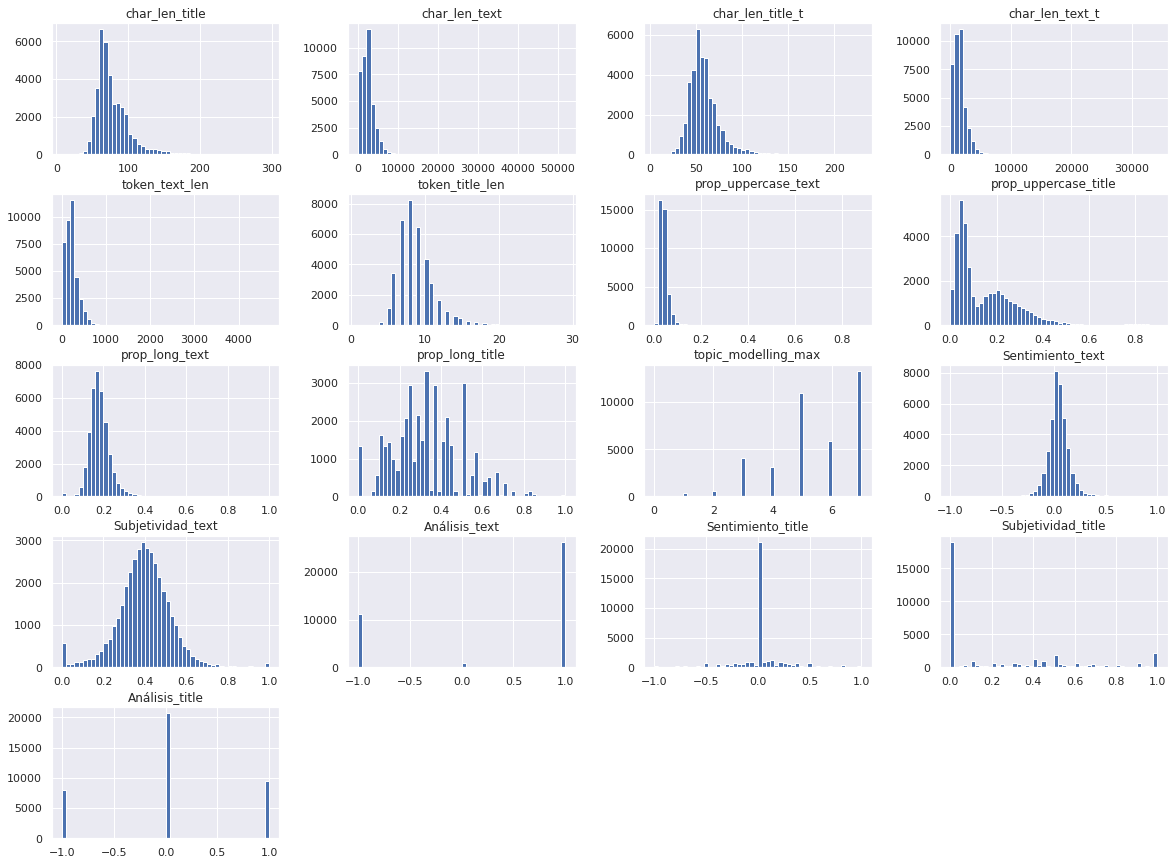

In [ ]:
ISOT.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
ISOT.dtypes

title                    object
text                     object
subject                  object
date                     object
normaliza_text           object
normaliza_title          object
clean_text               object
clean_title              object
char_len_title            int64
char_len_text             int64
char_len_title_t          int64
char_len_text_t           int64
token_text_len            int64
token_title_len           int64
prop_uppercase_text     float64
prop_uppercase_title    float64
prop_long_text          float64
prop_long_title         float64
target                   object
normaliza_b_filter       object
topic_modelling          object
topic_modelling_max       int64
dtype: object

*   <h2>Conversión a formato datetime</h2>

<font color='darkblue'> Nos encargamos de la columna que describe la fecha. Estas se encuentran en formato string y las queremos en formato *datetime*. Antes de transformarlas comprobamos que todas tienen la misma longitud de caracteres, manteniendo su uniformidad.</font></n>

In [ ]:
ISOT['date_len'] = [len(x) for x in ISOT['date']]
print(ISOT['date_len'].value_counts())

17     7742
12     6687
18     6057
16     3687
14     3625
13     2902
15     2629
11     2472
19     2423
9        35
149       1
88        1
74        1
124       1
66        1
145       1
Name: date_len, dtype: int64


<font color='darkblue'> Vemos que hay algunas fechas que tienen longitudes sospechosas. Nos llaman la atención las de longitud 9 y aquellas que tienen una longitud superior a 19.

Las exploramos_</font></n>

In [ ]:
print(ISOT[ISOT['date_len']<10]['date'])

901      19-Feb-18
2581     18-Feb-18
3138     16-Feb-18
3879     17-Feb-18
7379     18-Feb-18
8654     15-Feb-18
11840    17-Feb-18
13244    16-Feb-18
14169    15-Feb-18
14967    16-Feb-18
16650    15-Feb-18
16708    15-Feb-18
16814    17-Feb-18
17293    17-Feb-18
19662    18-Feb-18
19741    18-Feb-18
19833    16-Feb-18
20160    16-Feb-18
21547    16-Feb-18
21936    17-Feb-18
22856    18-Feb-18
22969    15-Feb-18
24240    19-Feb-18
24263    18-Feb-18
24647    15-Feb-18
26806    16-Feb-18
28363    15-Feb-18
30744    19-Feb-18
32496    15-Feb-18
35487    18-Feb-18
36172    17-Feb-18
36287    17-Feb-18
36353    16-Feb-18
37242    15-Feb-18
37504    14-Feb-18
Name: date, dtype: object


In [ ]:
print(ISOT[ISOT['date_len']>19]['date'])

5217     https://100percentfedup.com/12-yr-old-black-co...
9678     https://100percentfedup.com/video-hillary-aske...
27279    https://fedup.wpengine.com/wp-content/uploads/...
29175    MSNBC HOST Rudely Assumes Steel Worker Would N...
33678    https://fedup.wpengine.com/wp-content/uploads/...
37992    https://100percentfedup.com/served-roy-moore-v...
Name: date, dtype: object


<font color='darkblue'> Parece que las que tienen una longitud de 9 caracteres describen fechas, por lo que podremos transformarlas a formato datetime. Sin embargo, las que tienen una longitud muy grande son enlaces o noticias. Decidimos eliminar estas filas porque la fecha es una variable que podemos emplear a la hora de entrenar a nuestros modelos.</font></n>

In [ ]:
ISOT = ISOT.drop(ISOT[ISOT['date_len'] > 19].index)

<font color='darkblue'> Finalmente modificamos todas las fechas de nuestro dataframe haciendo uso de un bucle *for* con funciones *try/except* anidadas que consideren todos los formatos en los que están escritas.</font></n>

In [ ]:
from datetime import datetime
dates = []
for x in ISOT['date']: 
  try : 
    date = datetime.strptime(x, '%B %d, %Y')
  except ValueError:
    try : 
      date = datetime.strptime(x, '%d-%b-%y')
    except ValueError:
      try :
        date = datetime.strptime(x, '%b %d, %Y')
      except ValueError:
          date = datetime.strptime(x, '%B %d, %Y ')
  dates.append(date)
ISOT['date'] = dates

In [ ]:
del ISOT['date_len']

In [ ]:
ISOT.dtypes



title                           object
text                            object
subject                         object
date                    datetime64[ns]
normaliza_text                  object
normaliza_title                 object
clean_text                      object
clean_title                     object
char_len_title                   int64
char_len_text                    int64
char_len_title_t                 int64
char_len_text_t                  int64
token_text_len                   int64
token_title_len                  int64
prop_uppercase_text            float64
prop_uppercase_title           float64
prop_long_text                 float64
prop_long_title                float64
target                          object
normaliza_b_filter              object
topic_modelling                 object
topic_modelling_max              int64
Sentimiento_text               float64
Subjetividad_text              float64
Análisis_text                    int64
Sentimiento_title        

<font color='darkblue'> Finalmente guardamos nuestro dataframe.</font>

In [ ]:
ISOT = ISOT.sample(frac=1).reset_index(drop=True)
ISOT

,title,text,subject,date,normaliza_text,normaliza_title,clean_text,clean_title,char_len_title,char_len_text,...,target,normaliza_b_filter,topic_modelling,topic_modelling_max,Sentimiento_text,Subjetividad_text,Análisis_text,Sentimiento_title,Subjetividad_title,Análisis_title
0,Trump signs order for tighter vetting to preve...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,2017-01-27,"[washington, reuters, president, donald, trump...","[trump, sign, order, tight, vetting, prevent, ...",washington reuters president donald trump frid...,trump sign order tight vetting prevent terrorism,58,654,...,True,"[washington, reuters, president, donald, trump...","[(2, 0.3180311), (3, 0.20010819), (4, 0.481027...",4,0.077825,0.378344,1,-0.178571,0.285714,-1
1,Episode #162 â SUNDAY WIRE: âThe Revolutio...,Episode #162 of SUNDAY WIRE SHOW resumes this ...,US_News,2016-11-27,"[episode, 162, sunday, wire, show, resume, nov...","[episode, 162, sunday, wire, revolution, telev...",episode 162 sunday wire show resume november 2...,episode 162 sunday wire revolution televise gu...,98,1745,...,Fake,"[episode, sunday, wire, show, resume, november...","[(1, 0.49241078), (2, 0.05911816), (3, 0.27540...",7,0.091728,0.437931,1,0.000000,0.000000,0
2,"Trump moves ahead with wall, puts stamp on U.S...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,2017-01-25,"[washington, reuters, president, donald, trump...","[trump, move, ahead, wall, put, stamp, immigra...",washington reuters president donald trump wedn...,trump move ahead wall put stamp immigration se...,76,6918,...,True,"[washington, reuters, president, donald, trump...","[(1, 0.03007971), (2, 0.1735542), (3, 0.123792...",7,-0.033124,0.350857,-1,0.000000,0.000000,0
3,HILLARY SHARES PRO-ILLEGAL MANIFESTO: Plans To...,"To hell with the common sense voter, Hillary b...",politics,2016-06-25,"[hell, common, sense, voter, hillary, believe,...","[hillary, share, manifesto, plan, open, border...",hell common sense voter hillary believe need a...,hillary share manifesto plan open border creat...,115,4800,...,Fake,"[hell, common_sense, voter, hillary, believe, ...","[(1, 0.16177486), (3, 0.3916896), (5, 0.446401...",5,0.041431,0.476418,1,-0.250000,0.500000,-1
4,"Appellate judges Garland, Srinivasan considere...",WASHINGTON (Reuters) - The White House is vett...,politicsNews,2016-03-05,"[washington, reuters, white, house, vetting, f...","[appellate, judge, garland, srinivasan, consid...",washington reuters white house vetting federal...,appellate judge garland srinivasan consider to...,71,1833,...,True,"[washington, reuters, white, house, vetting, f...","[(1, 0.039390966), (5, 0.8018443), (7, 0.15841...",7,0.104933,0.469532,1,0.500000,0.500000,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38254,Colorado Police Officer Convicted Of Murder I...,"On Thursday, June 23, 2016, a Colorado jury co...",News,2016-06-24,"[thursday, june, 23, 2016, colorado, jury, con...","[colorado, police, officer, convict, murder, j...",thursday june 23 2016 colorado jury convict fo...,colorado police officer convict murder jack ja...,77,2191,...,Fake,"[thursday, june, colorado, jury, convict, form...","[(1, 0.66414905), (3, 0.06504034), (7, 0.27051...",7,-0.001318,0.261067,-1,0.000000,0.000000,0
38255,Lebanon's Hariri must return home from Saudi t...,PARIS (Reuters) - Lebanon s Saad al-Hariri can...,worldnews,2017-11-14,"[paris, reuters, lebanon, saad, prove, free, r...","[lebanon, hariri, must, return, home, saudi, p...",paris reuters lebanon saad prove free return h...,lebanon hariri must return home saudi prove fr...,82,2520,...,True,"[paris, reuters, lebanon, saad, prove, free, r...","[(2, 0.10470789), (4, 0.89499766)]",4,0.083524,0.393190,1,0.137500,0.462500,1
38256,Pope begins Myanmar trip in shadow of Rohingya...,YANGON (Reuters) - Pope Francis landed in Yang...,worldnews,2017-11-27,"[yangon, reuters, pope, francis, land, yangon,...","[pope, begin, myanm

<font color='darkblue'> Guardamos el dataframe .</font></n>

In [ ]:
path = '/content/drive/MyDrive/Fake_News/'
pickle_out = open(path + 'ISOT_topic_sentiment_pickle', 'wb')
pickle.dump(ISOT, pickle_out)
pickle_out.close()